In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#!unzip  '/content/drive/MyDrive/Ailoofah/Ailoofah.zip'
drive_path = '/content/drive/MyDrive/Ailoofah'

In [40]:
!nvidia-smi

Mon Mar 15 07:55:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    32W / 250W |   8777MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [41]:
import tensorflow as tf
import tensorflow.keras as keras
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
      # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


Method-1: Reading Mango Dataset

In [42]:
from pandas import read_csv
import pandas as pd
# load file as CSV
from sklearn.preprocessing import LabelBinarizer
import numpy
import numpy as np
filename = '/content/drive/MyDrive/Ailoofah/Sample_Label.csv'
mapping1_csv = read_csv(filename,encoding="Big5")
filename = '/content/drive/MyDrive/Ailoofah/Test.csv'
mapping2_csv = read_csv(filename,encoding="Big5")
mapping1_csv = mapping1_csv.values.tolist()
mapping2_csv = mapping2_csv.values.tolist()

In [43]:
import cv2
import os
from PIL import Image
from numpy import savez_compressed
from numpy import asarray

def load_dataset(directory,mapping_csv):
    X, y = list(), list()
    data = []
    labels = []
    i=0
    # loop over the image paths
    for imagePath, label in mapping_csv:
        image = Image.open(directory + imagePath)
        image = image.convert('RGB')
        image = image.resize((224,224))
        image = asarray(image)
        data.append(image)
        labels.append(label)
    # convert the data and labels to NumPy arrays while scaling the pixel
    # perform one-hot encoding on the labels
    from keras import utils as np_utils
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    X.extend(data)
    y.extend(labels)
    return asarray(X), asarray(y)

In [44]:
trainX, trainy = load_dataset('/content/drive/MyDrive/Ailoofah/Sample/',mapping1_csv)
print(trainX.shape, trainy.shape)

(72, 224, 224, 3) (72, 4)


In [45]:
testX, testy = load_dataset('/content/drive/MyDrive/Ailoofah/Test/',mapping2_csv)
print(testX.shape, testy.shape)

(20, 224, 224, 3) (20, 4)


In [46]:
savez_compressed(drive_path + 'dataset.npz', trainX, trainy, testX, testy)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(72, 224, 224, 3)
(72, 4)
(20, 224, 224, 3)
(20, 4)


In [47]:
import tensorflow.keras as keras
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
import tensorflow as tf
data = load(drive_path + 'dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (72, 224, 224, 3) (72, 4) (20, 224, 224, 3) (20, 4)


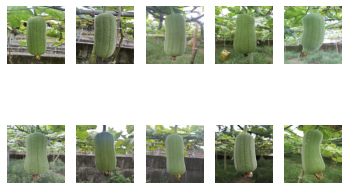

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
for i in range(1,11):
    ima = Image.fromarray(trainX[i],'RGB')
    plt.subplot(2, 5, i)
    plt.axis('off')
    plt.imshow(ima)
plt.show()

In [49]:
#https://keras.io/api/preprocessing/image/

In [50]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.0,
                                featurewise_center=True,
                                featurewise_std_normalization=True,
                                #rotation_range=30,
                                #brightness_range=[0.9,1.0],
                                #horizontal_flip=True,
                                #vertical_flip=True,
                                #fill_mode='nearest',
                                )
datagen.mean = [0.485,0.456,0.406]
datagen.std = np.array([0.229,0.224,0.225], dtype=np.float32).reshape((1,1,3))
datagen_val =ImageDataGenerator(rescale=1/255.0,
                                featurewise_center=True,
                                featurewise_std_normalization=True
                                )
datagen_val.mean = [0.485,0.456,0.406]
datagen_val.std = np.array([0.229,0.224,0.225], dtype=np.float32).reshape((1,1,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


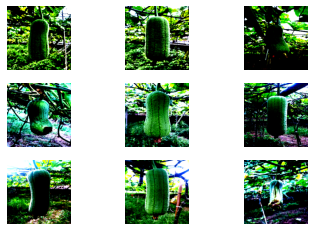

[0.485, 0.456, 0.406]


In [51]:
train_generator = datagen.flow(trainX, trainy, batch_size=16,seed=1)
import matplotlib.pyplot as plt
# generate samples and plot
for i in range(0,9):
    batch = train_generator.next()
    image = batch[0][0]
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(image)
# show the figure
plt.show()
print(datagen.mean)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


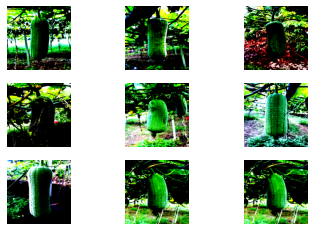

[0.485, 0.456, 0.406]


In [52]:
valid_generator = datagen_val.flow(testX, testy, batch_size=16)
for i in range(0,9):
    batch = valid_generator.next()
    image = batch[0][0]
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(image)
# show the figure
plt.show()
print(datagen_val.mean)

In [53]:
import sys
import tensorflow.keras as keras
from matplotlib import pyplot
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
#from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense,Dropout,Conv2D,Input,MaxPooling2D,Flatten,concatenate
from keras.optimizers import SGD,Nadam
from keras.preprocessing.image import ImageDataGenerator

def define_model():
    input_shape = Input(shape=(224,224,3))
    model = VGG16(include_top=False, weights='imagenet', input_tensor=input_shape)
    #是否要訓練預訓練模型的權重
    for layer in model.layers:
        layer.trainable = True
    flat = Flatten()(model.layers[-1].output)
    Dense1 = Dense(512, activation='relu')(flat)
    Dense2 = Dense(128, activation='relu')(Dense1)
    output = Dense(4, activation='softmax')(Dense2)
    # define new model
    model = Model(inputs=input_shape, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.5,decay=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = define_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:
from keras.callbacks import ModelCheckpoint
save_model=drive_path+"model1_best.h5"
checkpoint=ModelCheckpoint(save_model,monitor='val_accuracy',save_best_only=True,mode='max')
callbacks_list=[checkpoint] 

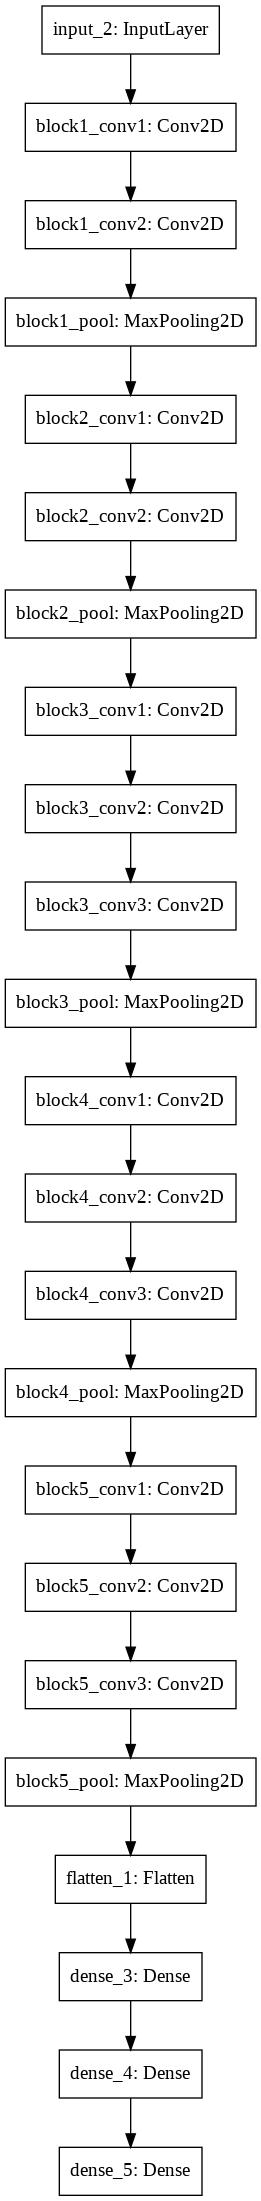

In [55]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [56]:
history=model.fit_generator(generator=train_generator, 
                validation_data=valid_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                validation_steps=valid_generator.n//valid_generator.batch_size,
                epochs=10,
                verbose=1,
                callbacks=callbacks_list)
model.save(drive_path+'model1_savepoint.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
4/4 [==============================] - 3s 209ms/step - loss: 1.6744 - accuracy: 0.1745 - val_loss: 1.5554 - val_accuracy: 0.1875
Epoch 2/10
4/4 [==============================] - 1s 141ms/step - loss: 1.1312 - accuracy: 0.5079 - val_loss: 1.4944 - val_accuracy: 0.1875
Epoch 3/10
4/4 [==============================] - 1s 140ms/step - loss: 0.8537 - accuracy: 0.7862 - val_loss: 1.3734 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 1s 128ms/step - loss: 0.5923 - accuracy: 0.8783 - val_loss: 1.3960 - val_accuracy: 0.4375
Epoch 5/10
4/4 [==============================] - 1s 127ms/step - loss: 0.4877 - accuracy: 0.8747 - val_loss: 1.4061 - val_accuracy: 0.3125
Epoch 6/10
4/4 [==============================] - 1s 128ms/step - loss: 0.2760 - accuracy: 0.9929 - val_loss: 1.4311 - val_accuracy: 0.3750
Epoch 7/10
4/4 [==============================] - 1s 139ms/step - loss: 0.1831 - accuracy: 1.0000 - val_loss: 1.5463 - val_accuracy: 0.2500
Epoch 8/10
4/4 [====

In [57]:
import numpy as np
#顯示跑出驗證集最佳正確率的紀錄
history.history["val_accuracy"][np.argmax(history.history["val_accuracy"])]

0.4375

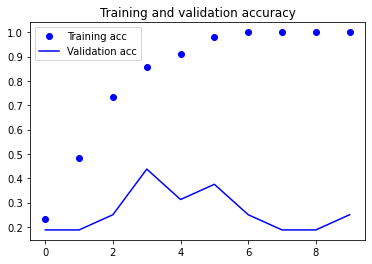

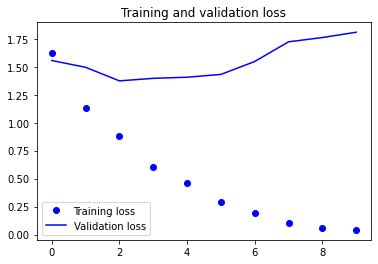

In [58]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
from keras.models import load_model
model = load_model(drive_path+"model1_best.h5")

In [60]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
dd = {0:0, 1:1, 2:2, 3:3, 4:4}
def load_image1(i,h):
    # load the image
    if(h==0):
        img = Image.fromarray(testX[i],'RGB')
    if(h==1):
        img = Image.fromarray(trainX[i],'RGB')
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img/255.0
    img = img - [0.485,0.456,0.406]
    img = img / np.array([0.229,0.224,0.225], dtype=np.float32).reshape((1,1,3))
    return img

def run_example1(a,h):
    # load the image
    img = load_image1(a,h)
    # predict the class
    #result = model.predict([img,img])
    result = model.predict(img)
    return dd[result[0].tolist().index(max(result[0].tolist()))]

#訓練或驗證集
def test_data(h):
    PR=[[0,0],[0,0],[0,0],[0,0]]
    if(h==0):
        imag=testX
        label=testy
    if(h==1):
        imag=trainX
        label=trainy
    i=0
    while(i<len(imag)):
        if(h==1):
            a=run_example1(i,h)
        else:
            a=run_example1(i,h)
        if (label[i].tolist().index(max(label[i].tolist()))==0):
            if (label[i].tolist().index(max(label[i].tolist()))==a):
                PR[0][0]=PR[0][0]+1
            else:
                PR[0][1]=PR[0][1]+1
        if (label[i].tolist().index(max(label[i].tolist()))==1):
            if (label[i].tolist().index(max(label[i].tolist()))==a):
                PR[1][0]=PR[1][0]+1
            else:
                PR[1][1]=PR[1][1]+1
        if (label[i].tolist().index(max(label[i].tolist()))==2):
            if (label[i].tolist().index(max(label[i].tolist()))==a):
                PR[2][0]=PR[2][0]+1
            else:
                PR[2][1]=PR[2][1]+1
        if (label[i].tolist().index(max(label[i].tolist()))==3):
            if (label[i].tolist().index(max(label[i].tolist()))==a):
                PR[3][0]=PR[3][0]+1
            else:
                PR[3][1]=PR[3][1]+1
        i=i+1
    print(PR,"正確率:", (PR[0][0]+PR[1][0]+PR[2][0])/(PR[0][0]+PR[0][1]+PR[1][0]+PR[1][1]+PR[2][0]+PR[2][1]))
    print(PR[0],"A正確率:", (PR[0][0]/(PR[0][0]+PR[0][1])))
    print(PR[1],"B正確率:", (PR[1][0]/(PR[1][0]+PR[1][1])))
    print(PR[2],"C正確率:", (PR[2][0]/(PR[2][0]+PR[2][1])))
    print(PR[3],"D正確率:", (PR[3][0]/(PR[3][0]+PR[3][1])))

In [61]:
test_data(0)

[[3, 2], [4, 0], [0, 4], [1, 6]] 正確率: 0.5384615384615384
[3, 2] A正確率: 0.6
[4, 0] B正確率: 1.0
[0, 4] C正確率: 0.0
[1, 6] D正確率: 0.14285714285714285


In [62]:
test_data(1)

[[22, 2], [17, 0], [12, 7], [11, 1]] 正確率: 0.85
[22, 2] A正確率: 0.9166666666666666
[17, 0] B正確率: 1.0
[12, 7] C正確率: 0.631578947368421
[11, 1] D正確率: 0.9166666666666666
